In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!unzip archive.zip

!unzip -n "/content/drive/MyDrive/Colab Notebooks/archive.zip" -d "/content"

Archive:  /content/drive/MyDrive/Colab Notebooks/archive.zip
  inflating: /content/IPIP-FFM-data-8Nov2018/.directory  
  inflating: /content/IPIP-FFM-data-8Nov2018/codebook.txt  
  inflating: /content/IPIP-FFM-data-8Nov2018/data-final.csv  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# df = pd.read_csv("data-final.csv", delimiter='\t')

df = pd.read_csv("/content/IPIP-FFM-data-8Nov2018/data-final.csv", sep='\t')

In [6]:
print('Number of participants: ', len(df))

Number of participants:  1015341


In [7]:
df.head(5)

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   

              dateload  screenw  screenh  introelapse  testelapse  endelapse  \
0  2016-03-03 02:01:01    768.0   1024.0          9.0       234.0          6   
1  2016-03-03 02:01:20   1360.0    768.0         12.0       179.0         11   
2  2016-03-03 02:01:56   1366.0    768.0          3.0       186.0          7   
3  2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0          7   
4  2016-03-03 02:02:57   1366.0    768.0          8.0       315.0         17   

   IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
0    1       GB               51.5448                 0.1991  
1    1       MY                3.1698                101.706  
2    1       GB               54.9119                -1.3833  
3    1       GB                 51.75                  -1.25  
4    2       KE                   1.0                   38.0  

[5 rows x 110 columns]

In [8]:
columns = df.columns
for column in columns:
    print(column)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


## Data

### Data preprocessing

In [91]:
import numpy as np
X = df[df.columns[0:50]]

In [92]:
# show all columns of the 50
pd.set_option("display.max_columns", None)

In [93]:
print('Is there any missing value? ', X.isnull().values.any())
print('Count of missing values? ', X.isnull().values.sum())
X = X.fillna(0) # replace all mising value with 0
print('Number of participants after eliminating missing values: ', len(X))

Is there any missing value?  True
Count of missing values?  89150
Number of participants after eliminating missing values:  1015341


In [94]:
X.isnull().values.any()

np.False_

### Data visualize

In [13]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in X if column.startswith('EXT')]
EST = [column for column in X if column.startswith('EST')]
AGR = [column for column in X if column.startswith('AGR')]
CSN = [column for column in X if column.startswith('CSN')]
OPN = [column for column in X if column.startswith('OPN')]

In [14]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(X[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


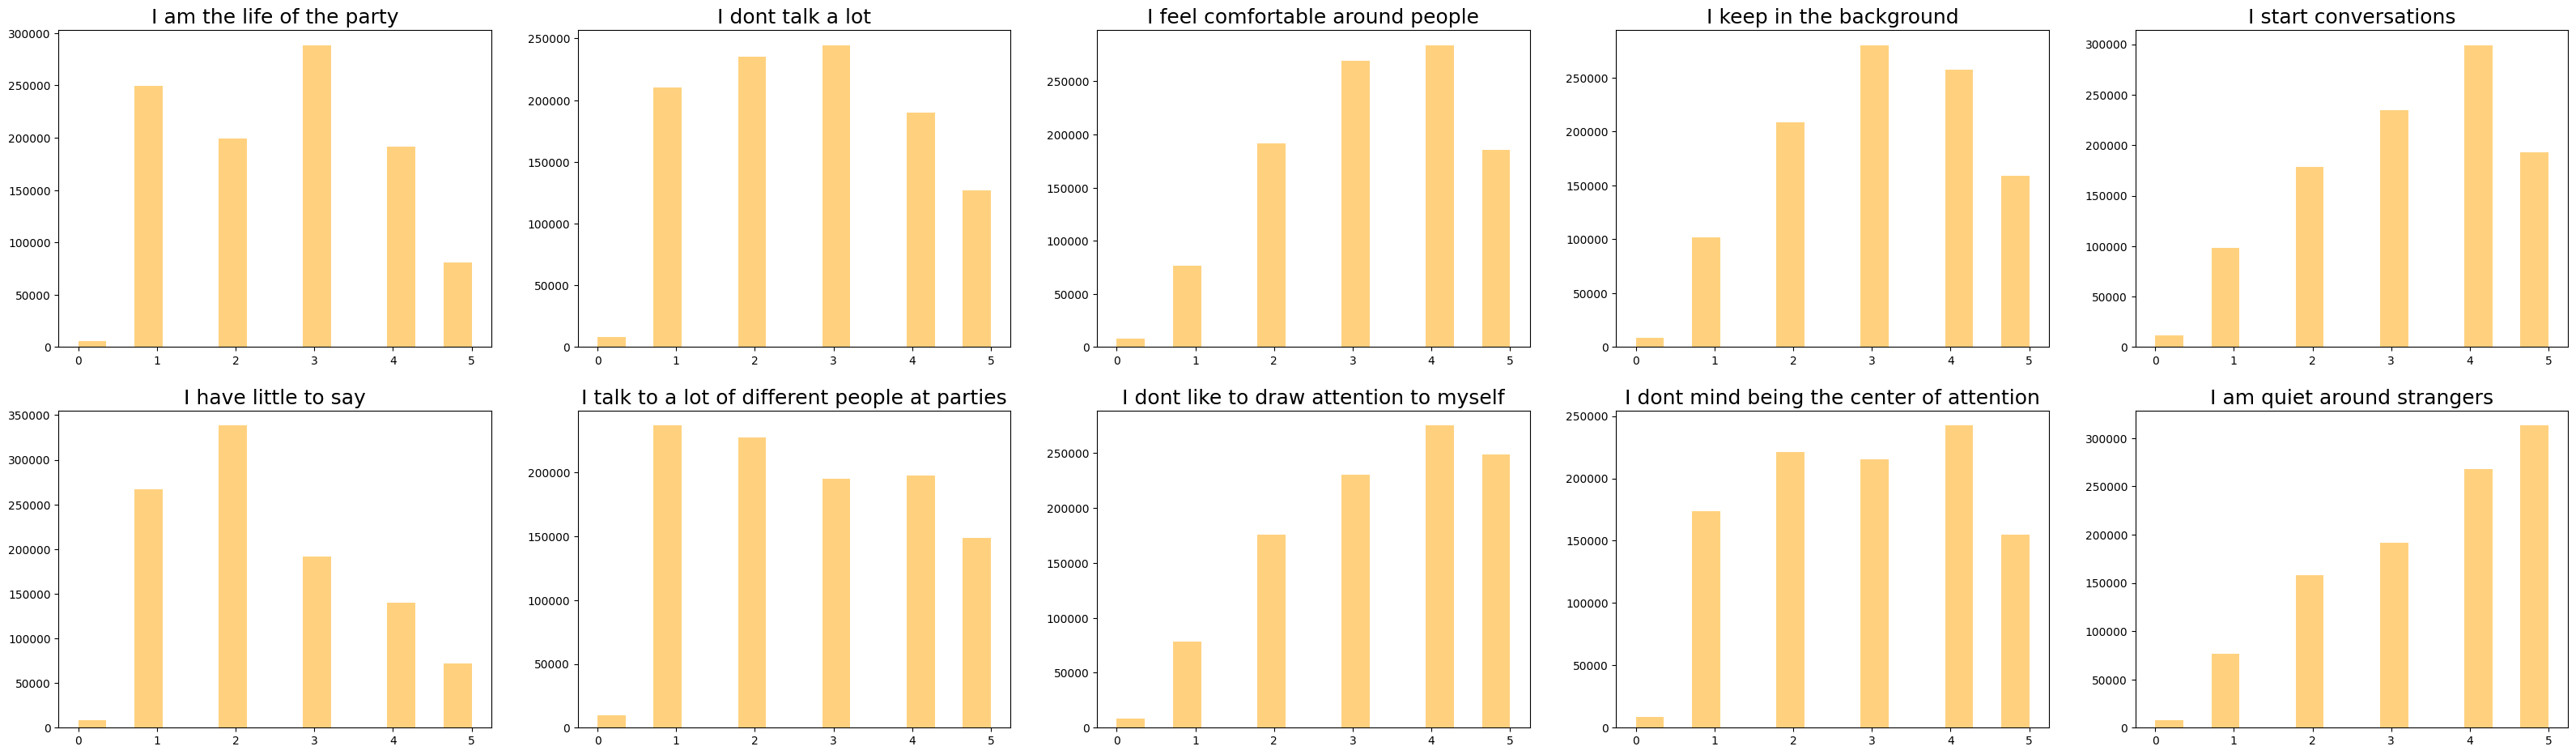

In [15]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


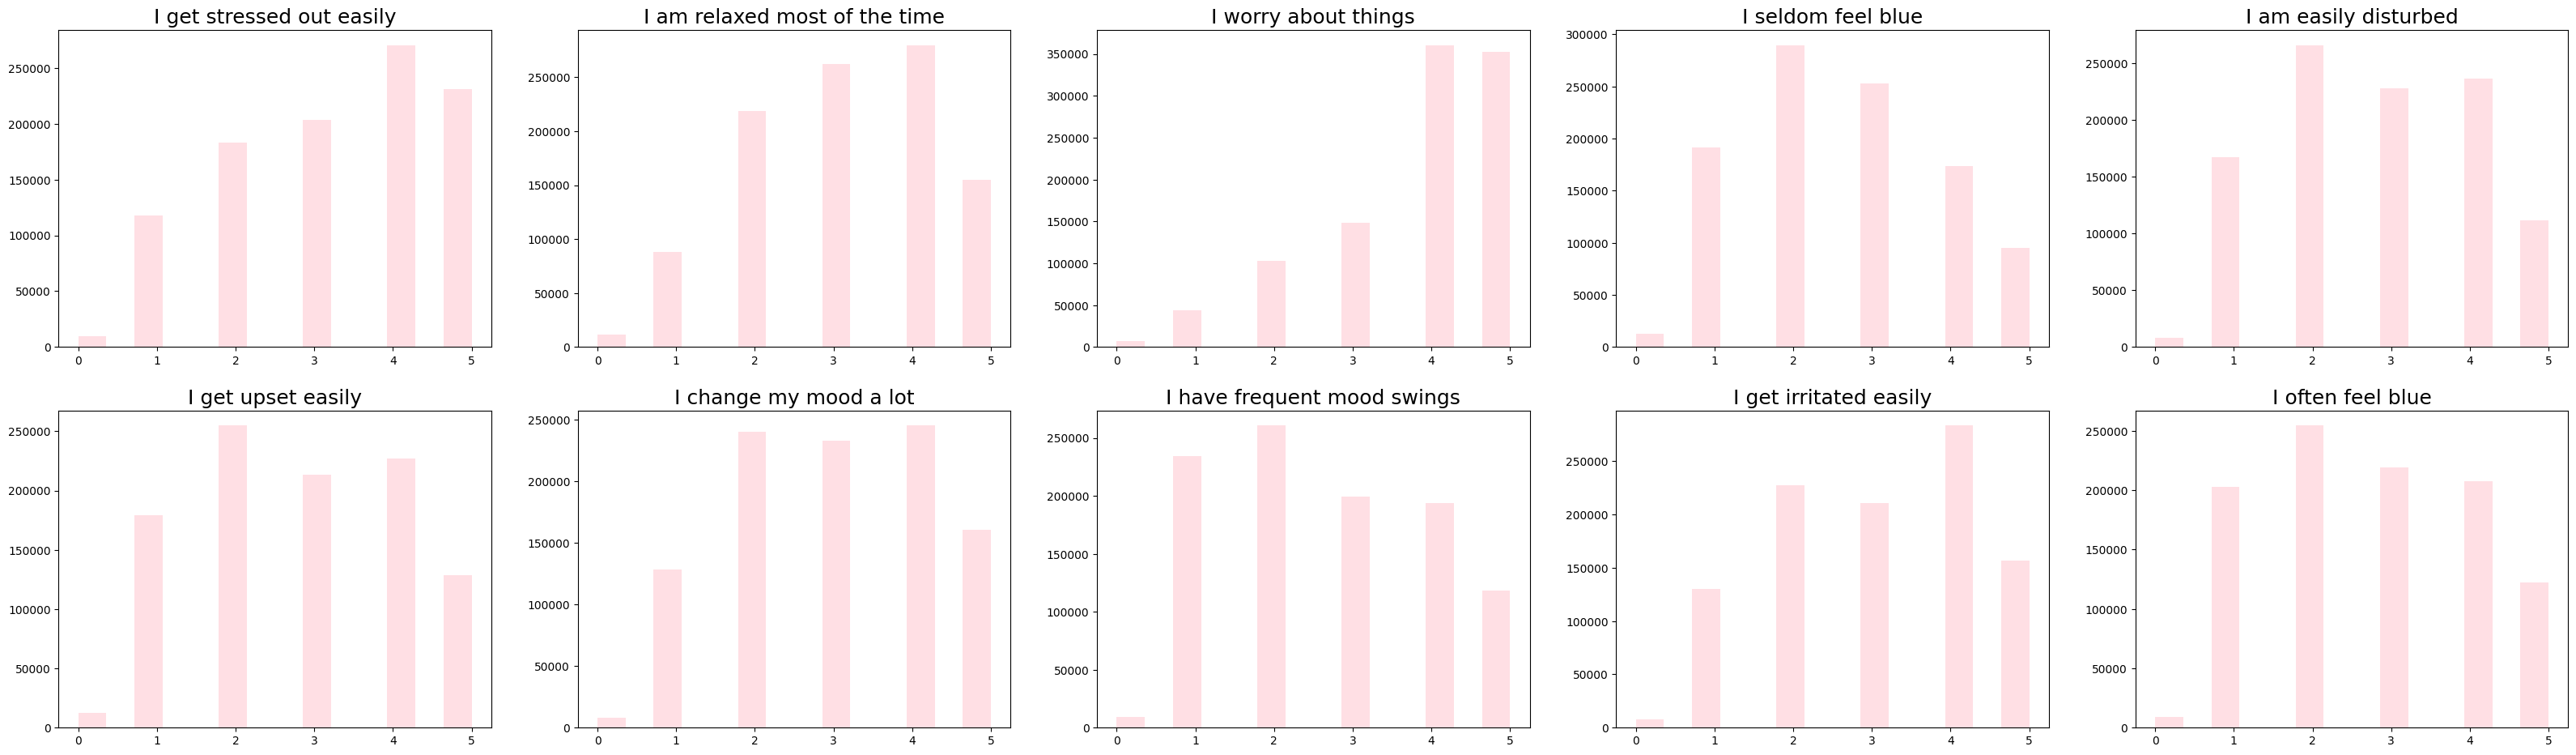

In [16]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


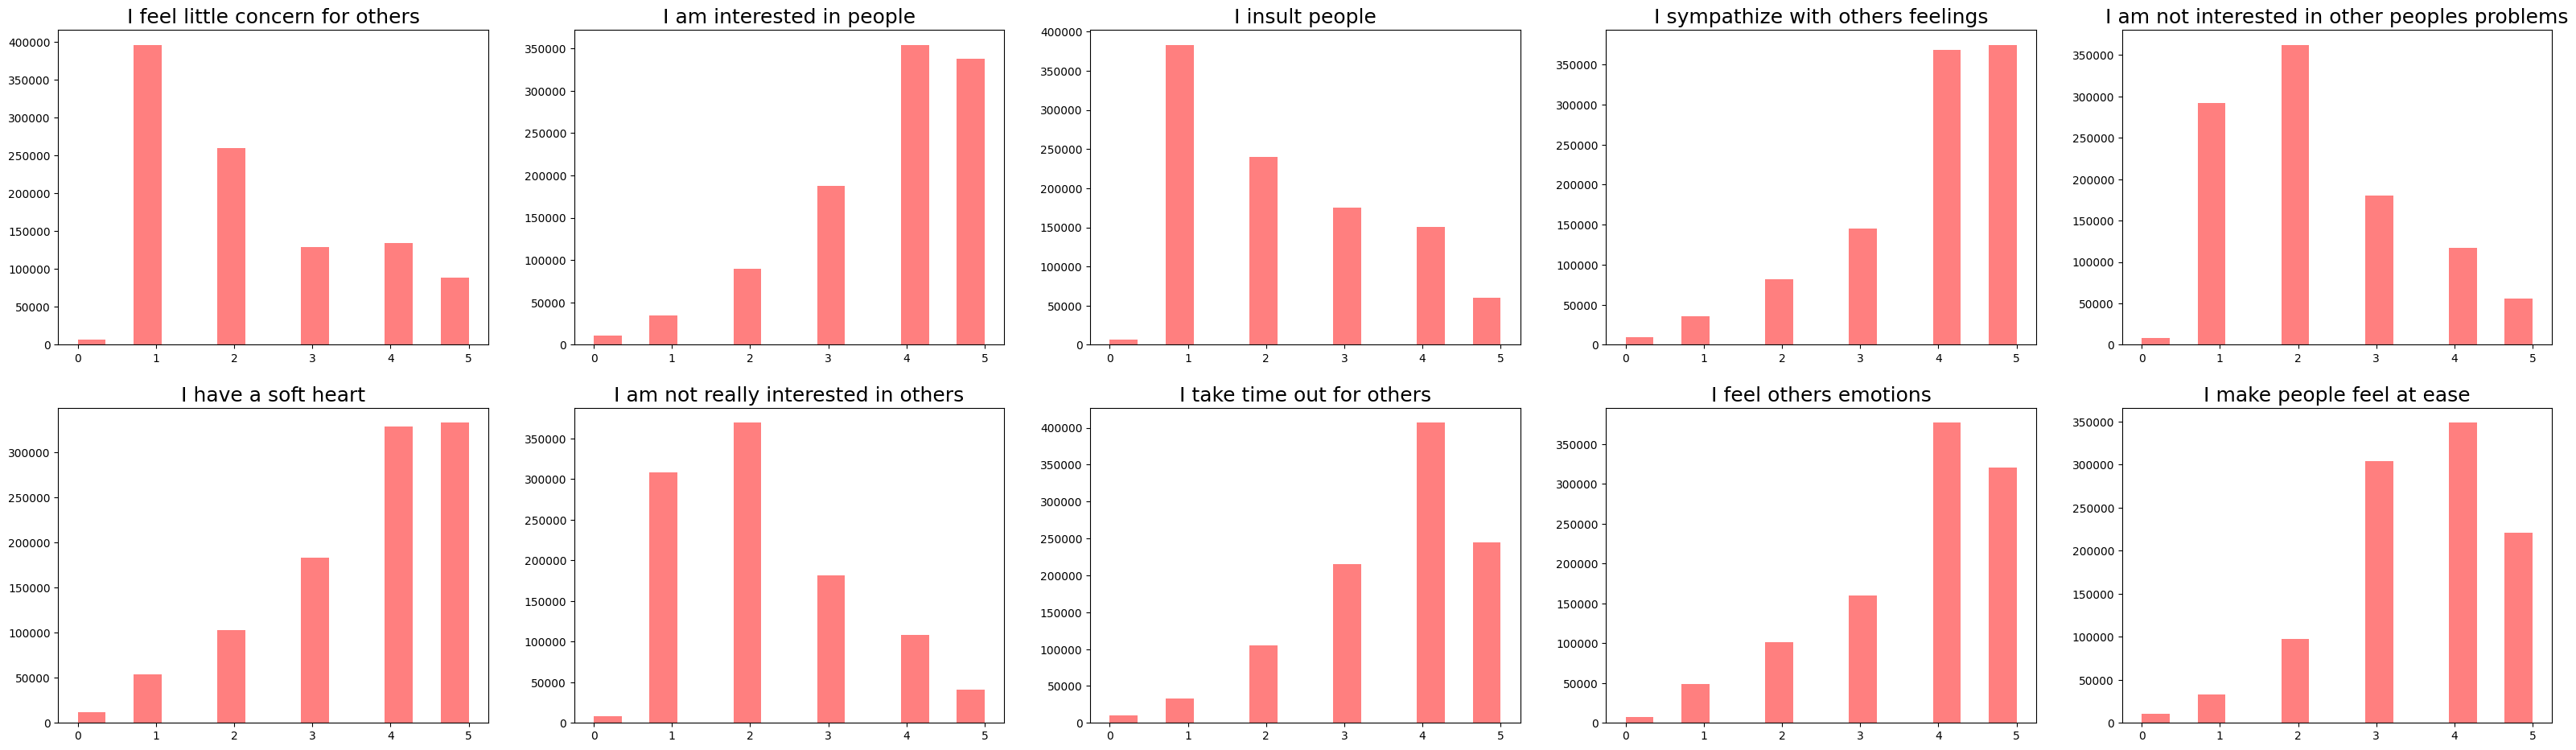

In [17]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


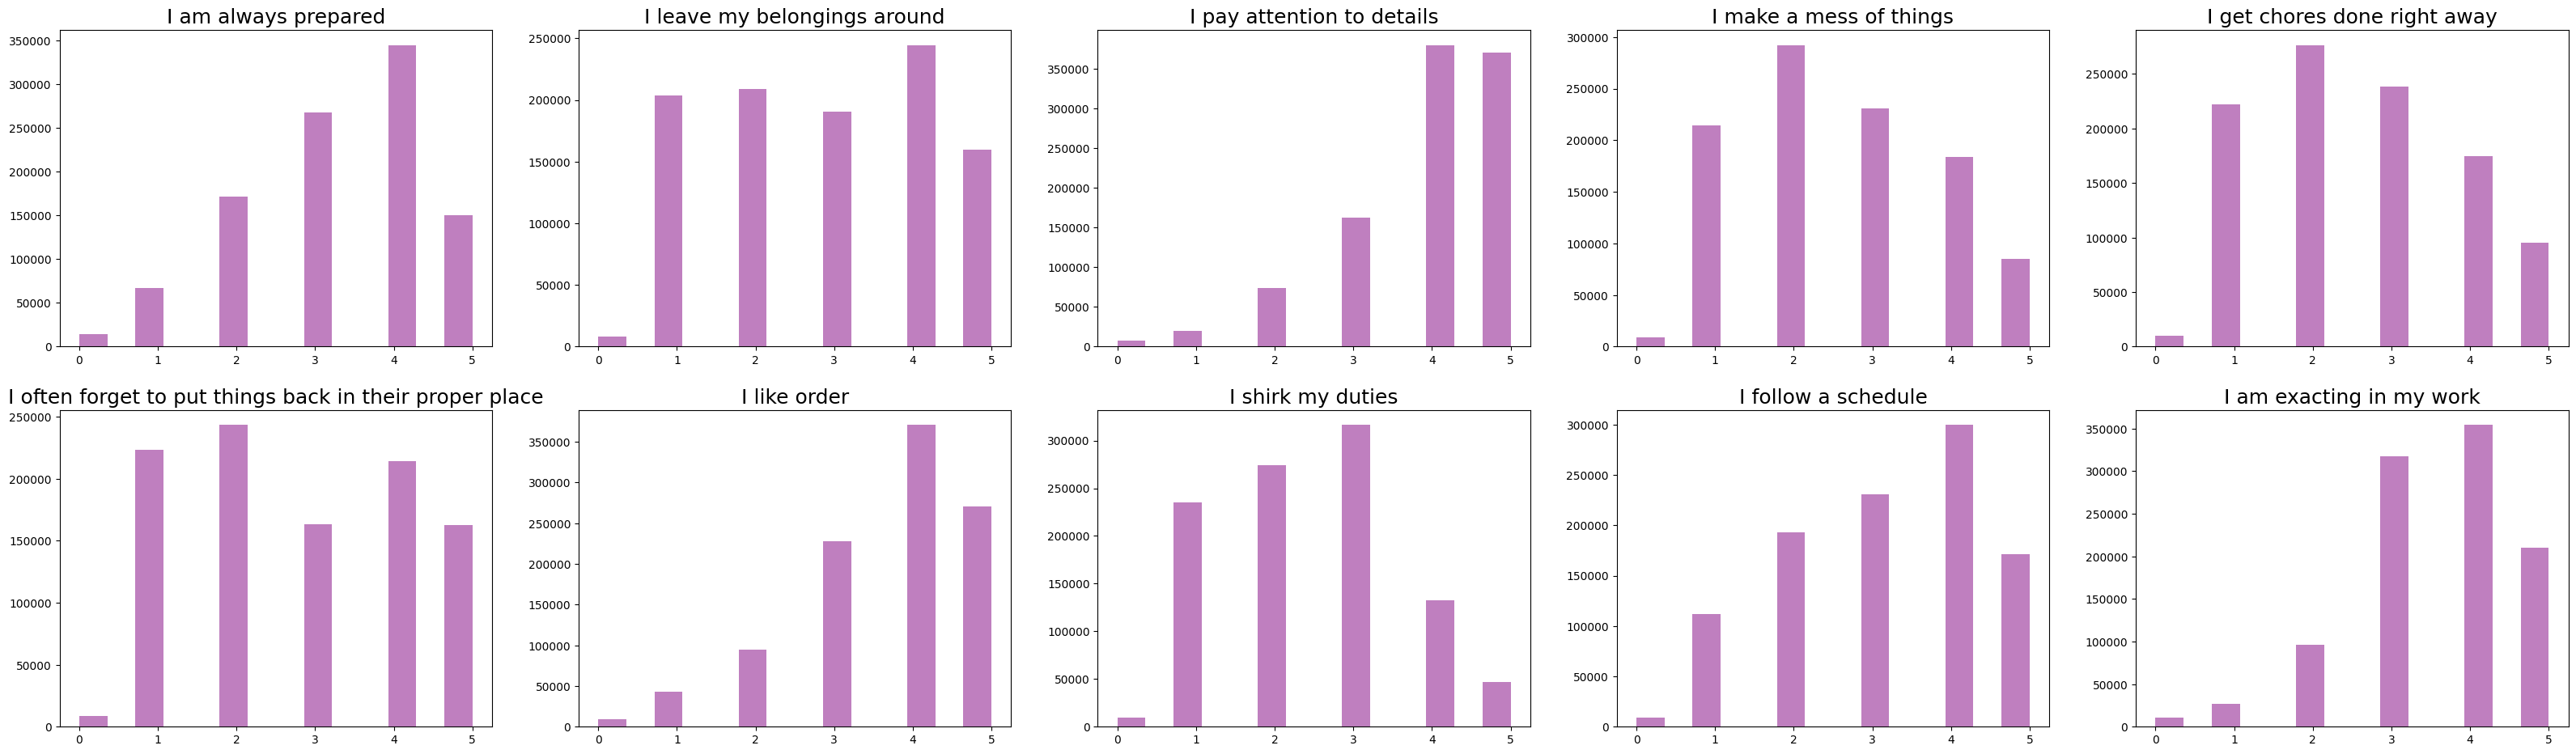

In [18]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


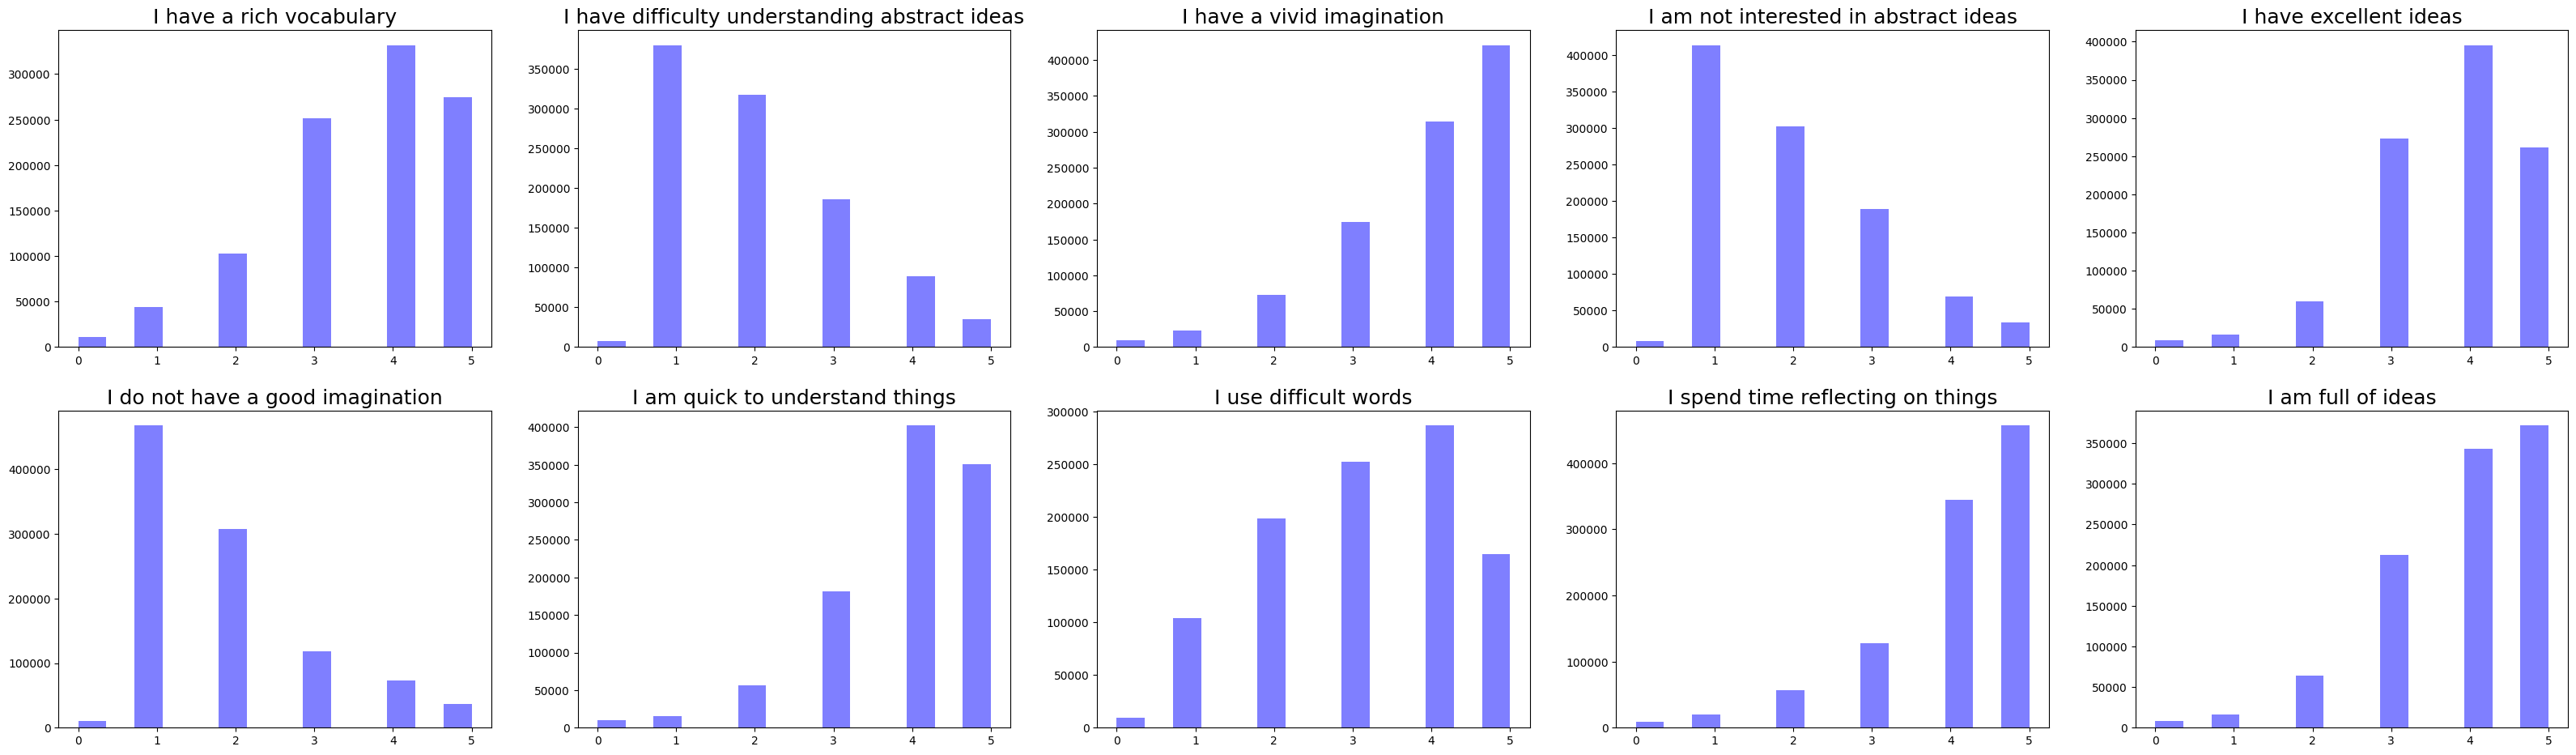

In [19]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

## Sklearn KMeans

In [95]:
from sklearn.cluster import KMeans

In [96]:
all_results = pd.DataFrame(columns=['Runtime (sec)', 'Speedup'], dtype=float)
all_results # Bảng biểu lưu lại thời gian chạy của tất cả các phiên bản

Empty DataFrame
Columns: [Runtime (sec), Speedup]
Index: []

In [97]:
import time

start_time = time.time()

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(X)

end_time = time.time()
print(f"Runtime: {end_time - start_time:.4f} seconds")

Runtime: 8.9664 seconds


In [98]:
all_results.loc['sklearn', 'Runtime (sec)'] = end_time - start_time
all_results.loc['sklearn', 'Speedup'] = None
all_results

Runtime (sec)  Speedup
sklearn       8.966447      NaN

In [99]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_

true_labels = predictions # Used for evaluating later

X['Clusters'] = predictions
X.head()

EXT1  EXT2  EXT3  EXT4  EXT5  ...  OPN7  OPN8  OPN9  OPN10  Clusters
0   4.0   1.0   5.0   2.0   5.0  ...   5.0   3.0   4.0    5.0         2
1   3.0   5.0   3.0   4.0   3.0  ...   4.0   2.0   5.0    3.0         1
2   2.0   3.0   4.0   4.0   3.0  ...   5.0   3.0   4.0    4.0         1
3   2.0   2.0   2.0   3.0   4.0  ...   4.0   4.0   3.0    3.0         0
4   3.0   3.0   3.0   3.0   5.0  ...   5.0   3.0   5.0    5.0         2

[5 rows x 51 columns]

In [100]:
X.Clusters.value_counts().sort_index(ascending=True)

Clusters
0    156262
1    216640
2    211497
3    202096
4    228846
Name: count, dtype: int64

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

PCA1      PCA2  Clusters
0 -5.337553  1.764438         2
1 -0.008970 -3.238459         1
2 -0.833547 -2.385054         1
3  0.956541 -1.199257         0
4 -4.811234 -1.745368         2

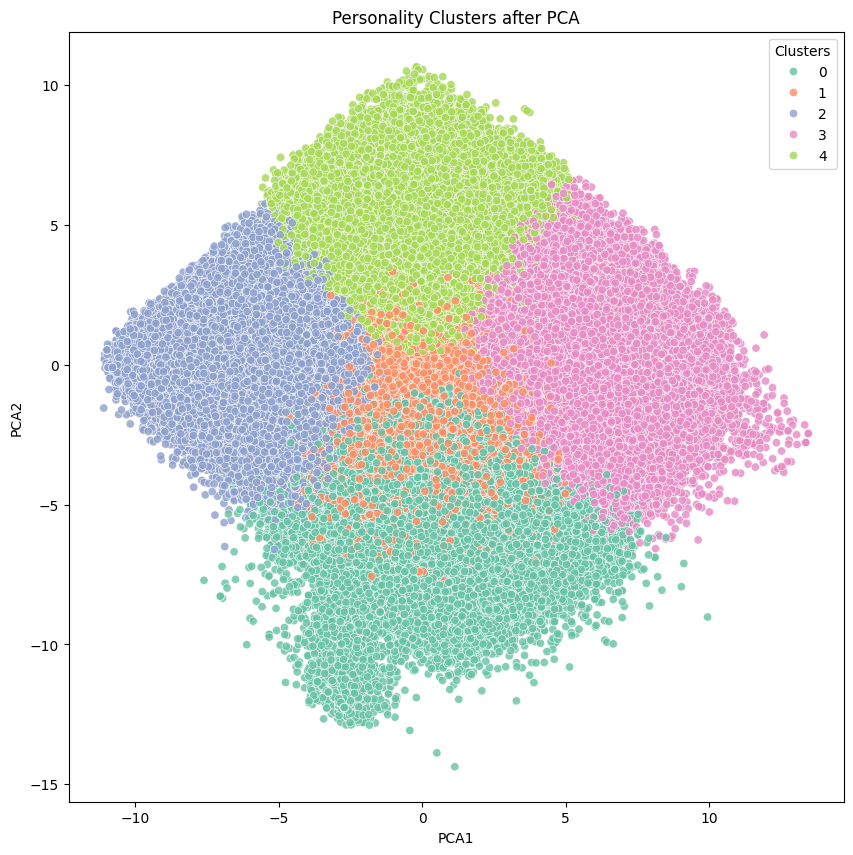

In [102]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

## Phiên bản tuần tự 1 (numpy)

### Thiết kế

hihi hehe

### Cài đặt

In [103]:
import random

In [112]:
import numpy as np

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeansImplement:
    def __init__(self, n_clusters=8, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self._labels = None
        self.n_iter_ = 0

    def fit(self, X_train):
        X_train = np.array(X_train, dtype=float)
        if X_train.ndim != 2:
            raise ValueError("X_train must be 2D: (n_samples, n_features)")

        # K-means++ initialization
        self.centroids = [X_train[np.random.choice(len(X_train))]]

        for _ in range(self.n_clusters - 1):
            # Calculate minimum distance to nearest existing centroid for each point
            min_dists = np.array([min(euclidean(point.reshape(1, -1), np.array(self.centroids)))
                                 for point in X_train])

            # Convert distances to probabilities
            probs = min_dists**2  # Square the distances (standard in K-means++)
            probs = probs / np.sum(probs)

            # Select next centroid
            new_centroid_idx = np.random.choice(len(X_train), p=probs)
            self.centroids.append(X_train[new_centroid_idx])

        self.centroids = np.array(self.centroids)

        # Main K-means loop
        for iteration in range(self.max_iter):
            # Assign clusters - vectorized approach
            distances = np.array([euclidean(X_train, centroid.reshape(1, -1))
                                for centroid in self.centroids]).T
            cluster_assignments = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.zeros_like(self.centroids)
            for i in range(self.n_clusters):
                mask = cluster_assignments == i
                if np.any(mask):
                    new_centroids[i] = np.mean(X_train[mask], axis=0)
                else:
                    new_centroids[i] = self.centroids[i]  # Keep old centroid if empty

            # Check convergence
            if np.all(np.linalg.norm(new_centroids - self.centroids, axis=1) < self.tol):
                break

            self.centroids = new_centroids

        # Store final cluster assignments as labels_
        distances = np.array([euclidean(X_train, centroid.reshape(1, -1))
                            for centroid in self.centroids]).T
        self._labels = np.argmin(distances, axis=1)
        self.n_iter_ = iteration + 1

        return self  # Return self to allow method chaining

    def predict(self, X):
        """Predict cluster assignments for new data points"""
        if self.centroids is None:
            raise ValueError("Model must be fitted before prediction")

        X = np.array(X, dtype=float)
        distances = np.array([euclidean(X, centroid.reshape(1, -1))
                            for centroid in self.centroids]).T
        return np.argmin(distances, axis=1)

    @property
    def labels_(self):
        """Access cluster labels with proper error handling"""
        if self._labels is None:
            raise ValueError("Model must be fitted before accessing labels_. Call fit() first.")
        return self._labels

    @labels_.setter
    def labels_(self, value):
        self._labels = value

    def fit_predict(self, X):
        """Fit the model and return cluster assignments for training data"""
        self.fit(X)
        return self.predict(X)


def compute_inertia(X, centroids, labels):
    """Compute within-cluster sum of squares"""
    inertia = 0.0
    for i in range(X.shape[0]):
        cluster_id = labels[i]
        for j in range(X.shape[1]):
            diff = X[i, j] - centroids[cluster_id, j]
            inertia += diff * diff
    return inertia


### Đánh giá

#### Thời gian chạy

In [113]:
sussy = df[df.columns[0:50]]
sussy = sussy.fillna(0)

In [114]:
sussy.head(5)

EXT1  EXT2  EXT3  EXT4  EXT5  ...  OPN6  OPN7  OPN8  OPN9  OPN10
0   4.0   1.0   5.0   2.0   5.0  ...   1.0   5.0   3.0   4.0    5.0
1   3.0   5.0   3.0   4.0   3.0  ...   1.0   4.0   2.0   5.0    3.0
2   2.0   3.0   4.0   4.0   3.0  ...   2.0   5.0   3.0   4.0    4.0
3   2.0   2.0   2.0   3.0   4.0  ...   1.0   4.0   4.0   3.0    3.0
4   3.0   3.0   3.0   3.0   5.0  ...   1.0   5.0   3.0   5.0    5.0

[5 rows x 50 columns]

In [115]:
import time

start_time = time.time()

kmeans_implement = KMeansImplement(n_clusters=5)
kmeans_implement.fit(sussy)

end_time = time.time()
print(f"Runtime: {end_time - start_time:.4f} seconds")

Runtime: 328.9316 seconds


In [116]:
all_results.loc['sequential 1: numpy operation', 'Runtime (sec)'] = end_time - start_time
all_results.loc['sequential 1: numpy operation', 'Speedup'] = 1
all_results

Runtime (sec)  Speedup
sklearn                             8.966447      NaN
sequential 1: numpy operation     328.931639      1.0

#### Tính đúng đắn

Một số metric được dùng:


* **Adjusted Rand Index (ARI):** Đo mức độ giống nhau giữa phân cụm dự đoán và nhãn thực tế, đã hiệu chỉnh để loại bỏ ngẫu nhiên. Giá trị nằm trong khoảng từ -1 đến 1, càng gần 1 càng tốt.

* **Normalized Mutual Information (NMI):** Đo lường lượng thông tin chung giữa hai phân cụm và chuẩn hóa để kết quả nằm trong khoảng \[0, 1]. Không bị ảnh hưởng bởi việc hoán đổi nhãn.

* **Homogeneity Score:** Mỗi cluster chỉ nên chứa điểm từ một class duy nhất. Càng cao thì cluster càng “thuần” theo nhãn thật.

* **Completeness Score:** Tất cả điểm từ một class nên nằm cùng một cluster. Điểm cao cho thấy các class không bị phân tán.

* **V-Measure Score:** Trung bình điều hòa của Homogeneity và Completeness, đánh giá cân bằng giữa sự thuần nhất và đầy đủ của phân cụm.

In [117]:
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)

def evaluate_clustering(true_labels, predicted_labels):
    """
    Calculte clustering evaluation metrics
    """
    ari = adjusted_rand_score(true_labels, predicted_labels)
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    homogeneity = homogeneity_score(true_labels, predicted_labels)
    completeness = completeness_score(true_labels, predicted_labels)
    v_measure = v_measure_score(true_labels, predicted_labels)


    print(f"Adjusted Rand Index (ARI): {ari:.4f}")
    print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
    print(f"Homogeneity Score: {homogeneity:.4f}")
    print(f"Completeness Score: {completeness:.4f}")
    print(f"V-Measure Score: {v_measure:.4f}")


In [118]:
# Generate synthetic data with true labels
from sklearn.datasets import make_blobs

blob_eval, blob_true_labels = make_blobs(n_samples=10000, centers=3, n_features=10, random_state=42)

# Evaluate with ARI, Homogeneity, etc.
print("\n" + "--------- Clustering Evaluation ---------")

# Use our KMeans to predict the labels
kmeans = KMeansImplement(n_clusters=3, max_iter=100)
blob_predicted_labels = kmeans.fit_predict(blob_eval)

# Evaluate
evaluate_clustering(blob_true_labels, blob_predicted_labels)


--------- Clustering Evaluation ---------
Adjusted Rand Index (ARI): 1.0000
Normalized Mutual Information (NMI): 1.0000
Homogeneity Score: 1.0000
Completeness Score: 1.0000
V-Measure Score: 1.0000


In [119]:
# Evaluate with ARI, Homogeneity, etc.
print("\n" + "--------- Clustering Evaluation ---------")
predicted_labels = kmeans_implement.labels_

print(f"\nIterations: {kmeans_implement.n_iter_}")
print(f"Final inertia: {compute_inertia(sussy.to_numpy(), kmeans_implement.centroids, predicted_labels):.2f}\n")
print("-" * 50 + "\n")
# Evaluate
evaluate_clustering(true_labels, predicted_labels)


--------- Clustering Evaluation ---------

Iterations: 120
Final inertia: 60741041.50

--------------------------------------------------

Adjusted Rand Index (ARI): 0.9747
Normalized Mutual Information (NMI): 0.9618
Homogeneity Score: 0.9617
Completeness Score: 0.9619
V-Measure Score: 0.9618




* **Số vòng lặp (Iterations):** Mô hình KMeans hội tụ sau 120 vòng lặp, cho thấy quá trình tối ưu hóa khá ổn định, không bị mắc kẹt sớm trong local minima.

* **Final inertia:** Giá trị quán tính cuối cùng là **60,741,041.50**, phản ánh tổng khoảng cách bình phương từ các điểm dữ liệu đến tâm cluster gần nhất.

* **Adjusted Rand Index (ARI = 0.9747):** Mức độ tương đồng giữa phân cụm và nhãn thực tế gần như hoàn hảo. Mô hình đã phân cụm rất chính xác.

* **Normalized Mutual Information (NMI = 0.9618):** Lượng thông tin chung giữa phân cụm và nhãn thực tế rất cao. Phân cụm không bị ảnh hưởng bởi thứ tự nhãn và vẫn đạt độ khớp rất tốt.

* **Homogeneity (0.9617) & Completeness (0.9619):**

  * **Homogeneity** cao → mỗi cluster chủ yếu chứa dữ liệu từ một class duy nhất.
  * **Completeness** cao → các điểm cùng class được gom vào cùng cluster.


* **V-Measure (0.9618):** Trung bình hài hòa của Homogeneity và Completeness → xác nhận lại rằng phân cụm có độ nhất quán và đầy đủ cao.

---

 ▶ **Kết luận**

Mô hình phân cụm đang hoạt động **rất hiệu quả**, với độ chính xác gần tuyệt đối khi so sánh với nhãn thực tế. Các chỉ số như ARI, NMI và V-Measure đều trên 0.96, chứng tỏ thuật toán không chỉ hội tụ tốt mà còn phân nhóm dữ liệu một cách rõ ràng, nhất quán và có ý nghĩa.


In [120]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions_cpu = kmeans_implement.labels_
sussy['Clusters'] = predictions_cpu
sussy.head()

EXT1  EXT2  EXT3  EXT4  EXT5  ...  OPN7  OPN8  OPN9  OPN10  Clusters
0   4.0   1.0   5.0   2.0   5.0  ...   5.0   3.0   4.0    5.0         4
1   3.0   5.0   3.0   4.0   3.0  ...   4.0   2.0   5.0    3.0         1
2   2.0   3.0   4.0   4.0   3.0  ...   5.0   3.0   4.0    4.0         1
3   2.0   2.0   2.0   3.0   4.0  ...   4.0   4.0   3.0    3.0         2
4   3.0   3.0   3.0   3.0   5.0  ...   5.0   3.0   5.0    5.0         4

[5 rows x 51 columns]

In [121]:
sussy.Clusters.value_counts().sort_index(ascending=True)

Clusters
0    229273
1    217197
2    154834
3    203253
4    210784
Name: count, dtype: int64

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(sussy)

df_pca_cpu = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca_cpu['Clusters'] = predictions_cpu
df_pca_cpu.head()

PCA1      PCA2  Clusters
0  5.556770  1.265511         4
1 -0.225686 -2.657603         1
2  0.619633 -1.861636         1
3 -1.081867 -0.574498         2
4  4.932310 -1.992827         4

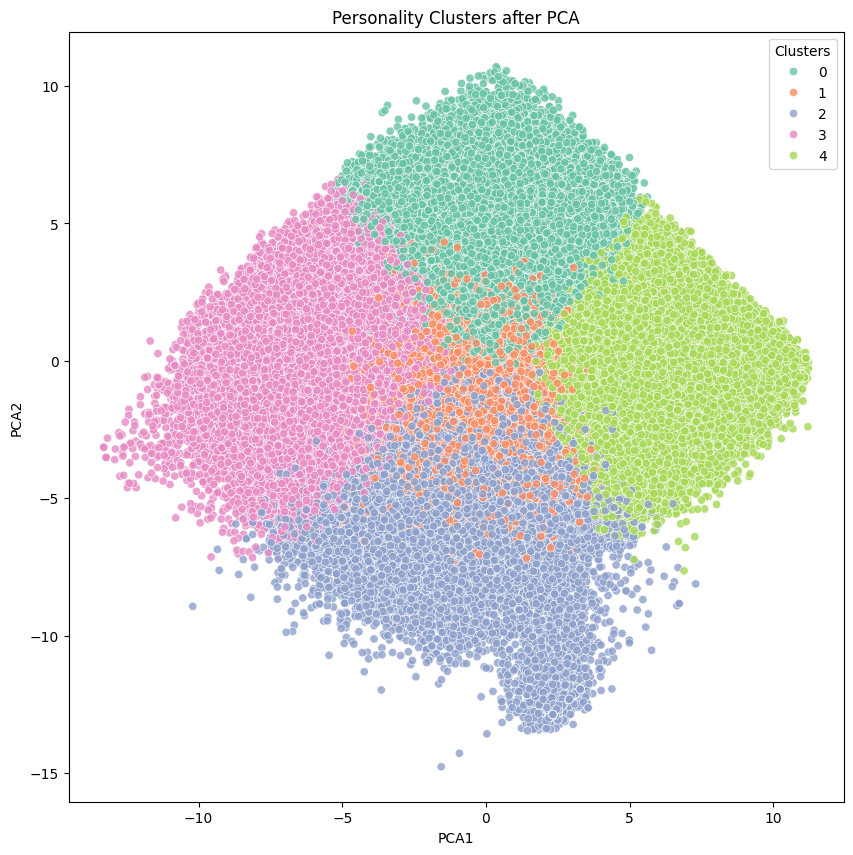

In [123]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_cpu, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

## Phiên bản tuần tự 2: dùng Numba để biên dịch hàm Python ra mã máy và chạy tuần tự trên CPU/host

### Thiết kế

#### **1. Tổng quan thay đổi giữa phiên bản tuần tự 1 và tuần tự 2**

Ở phiên bản tuần tự thứ hai, nhóm đã tiến hành tối ưu hoá cấu trúc của thuật toán KMeans bằng cách **chia nhỏ các khối xử lý chính thành các hàm riêng biệt**. Mỗi hàm này đều được đánh dấu với `@jit` từ thư viện **Numba** để tăng tốc thực thi bằng cách biên dịch trước các đoạn mã Python thành mã máy ở mức thấp. Việc này giúp tận dụng hiệu suất tính toán cao hơn, đặc biệt là đối với những đoạn code có nhiều vòng lặp lồng nhau – vốn là đặc trưng trong thuật toán KMeans.

Ngoài ra, nhóm còn cải tiến thêm phần **khởi tạo centroids theo kiểu KMeans++** bằng cách tách riêng logic chọn centroid mới và tính khoảng cách nhỏ nhất, thay vì gộp chung toàn bộ vào trong phương thức `fit` như phiên bản cũ. Những phần tính toán nặng như khoảng cách giữa điểm và centroid, cập nhật trung bình cụm, hoặc kiểm tra hội tụ đều được gom vào các hàm độc lập để thuận tiện cho việc tái sử dụng và dễ dàng tối ưu hóa tiếp sau này, ví dụ như song song hoá bằng Numba hoặc chuyển sang chạy GPU.



#### **2. Thiết kế chi tiết từng hàm**

**2.1 compute_distances_sequence**

Tính khoảng cách giữa từng điểm dữ liệu và tất cả các centroid.

**Input:**

* `X`: ma trận dữ liệu (n\_samples × n\_features)
* `centroids`: tọa độ của các centroid (n\_clusters × n\_features)

**Các bước thực hiện:**

* Cấp phát ma trận khoảng cách `(n_samples, n_clusters)`
* Với mỗi điểm dữ liệu `i` và mỗi centroid `j`:

  * Duyệt từng chiều `k`, tính `(X[i,k] - centroid[j,k])²`
  * Cộng lại để được khoảng cách bình phương
  * Lấy căn bậc hai và lưu vào `distances[i,j]`

**Output:** ma trận khoảng cách `(n_samples, n_clusters)`

**2.2 assign_clusters_sequence**

Gán mỗi điểm vào cụm có khoảng cách gần nhất.

**Input:**

* `distances`: ma trận khoảng cách (n\_samples × n\_clusters)

**Các bước thực hiện:**

* Duyệt từng điểm dữ liệu `i`

  * Tìm giá trị nhỏ nhất trên dòng `i` của `distances`
  * Gán chỉ số cụm gần nhất vào `assignments[i]`

**Output:** mảng `assignments` (n\_samples,)

**2.3 update_centroids_sequence**

Tính toán lại vị trí centroid bằng cách lấy trung bình các điểm thuộc cụm đó.

**Input:**

* `X`: dữ liệu
* `assignments`: cụm tương ứng cho từng điểm
* `n_clusters`: số cụm

**Các bước thực hiện:**

* Tạo `new_centroids` kích thước `(n_clusters, n_features)`
* Tạo `cluster_counts` đếm số điểm trong mỗi cụm
* Với mỗi cụm `i`:

  * Duyệt qua tất cả điểm `j`, nếu thuộc cụm `i`:

    * Cộng giá trị vào `new_centroids[i]`
    * Tăng `cluster_counts[i]`
  * Chia để lấy trung bình (nếu count > 0)

**Output:**

* `new_centroids`
* `cluster_counts`

**2.4 compute_min_distances_sequence** (cho KMeans++)

Tính khoảng cách nhỏ nhất từ mỗi điểm đến bất kỳ centroid đã chọn nào, dùng trong khởi tạo KMeans++.

**Input:**

* `X`: tập dữ liệu
* `centroids`: các centroid hiện tại

**Các bước thực hiện:**

* Với mỗi điểm `i`, tìm khoảng cách nhỏ nhất tới một centroid
* Lưu lại vào `min_distances[i]`

**Output:** mảng khoảng cách tối thiểu cho từng điểm

**2.5 check_convergence_sequence**

Kiểm tra các centroid có thay đổi đủ nhỏ (dưới ngưỡng tol) hay chưa – để xác định mô hình đã hội tụ.

**Input:**

* `old_centroids`, `new_centroids`, `tol`

**Các bước thực hiện:**

* Với mỗi cụm:

  * Tính norm² giữa centroid mới và cũ
  * Nếu norm ≥ `tol`: chưa hội tụ → trả về `False`
* Nếu tất cả cụm đều nhỏ hơn tol → `True`

**Output:** boolean `converged`

**2.6 compute_inertia**

Tính tổng bình phương khoảng cách giữa mỗi điểm và centroid tương ứng – đại diện cho độ "chặt" của cụm.

**Input:**

* `X`: tập dữ liệu
* `centroids`: tọa độ centroid
* `labels`: cụm của mỗi điểm

**Các bước thực hiện:**

* Duyệt từng điểm `i`, cụm `labels[i]`
* Tính tổng bình phương sai số giữa `X[i]` và `centroids[cluster_id]`

**Output:** giá trị tổng sai số nội cụm


### Cài đặt

In [124]:
import numpy as np
import numba
from numba import jit
import time

# distance computation
@jit()
def compute_distances_sequence(X, centroids):
    """
    Compute distances between all points and all centroids
    X shape: (n_samples, n_features)
    centroids shape: (n_clusters, n_features)
    Returns: (n_samples, n_clusters)
    """
    n_samples, n_features = X.shape
    n_clusters = centroids.shape[0]
    distances = np.zeros((n_samples, n_clusters), dtype=np.float64)

    for i in range(n_samples):
        for j in range(n_clusters):
            dist_sq = 0.0
            for k in range(n_features):
                diff = X[i, k] - centroids[j, k]
                dist_sq += diff * diff
            distances[i, j] = np.sqrt(dist_sq)

    return distances

# Cluster assignment
@jit()
def assign_clusters_sequence(distances):
    """
    Assign each point to nearest cluster
    """
    n_samples = distances.shape[0]
    assignments = np.zeros(n_samples, dtype=np.int32)

    for i in range(n_samples):
        min_dist = distances[i, 0]
        best_cluster = 0
        for j in range(1, distances.shape[1]):
            if distances[i, j] < min_dist:
                min_dist = distances[i, j]
                best_cluster = j
        assignments[i] = best_cluster

    return assignments

# Centroid update
@jit()
def update_centroids_sequence(X, assignments, n_clusters):
    """
    Update centroids by computing means
    """
    n_samples, n_features = X.shape
    new_centroids = np.zeros((n_clusters, n_features), dtype=np.float64)
    cluster_counts = np.zeros(n_clusters, dtype=np.int32)

    # Count points and sum coordinates for each cluster
    for cluster_id in range(n_clusters):
        count = 0
        for i in range(n_samples):
            if assignments[i] == cluster_id:
                count += 1
                for j in range(n_features):
                    new_centroids[cluster_id, j] += X[i, j]

        cluster_counts[cluster_id] = count

        # Compute mean (avoid division by zero)
        if count > 0:
            for j in range(n_features):
                new_centroids[cluster_id, j] /= count

    return new_centroids, cluster_counts

# K-means++ initialization
@jit()
def compute_min_distances_sequence(X, centroids):
    """
    Compute minimum distance to existing centroids for each point
    """
    n_samples = X.shape[0]
    n_centroids = centroids.shape[0]
    min_distances = np.zeros(n_samples, dtype=np.float64)

    for i in range(n_samples):
        min_dist = np.inf
        for j in range(n_centroids):
            dist_sq = 0.0
            for k in range(X.shape[1]):
                diff = X[i, k] - centroids[j, k]
                dist_sq += diff * diff
            dist = np.sqrt(dist_sq)
            if dist < min_dist:
                min_dist = dist
        min_distances[i] = min_dist

    return min_distances

# Check convergence
@jit()
def check_convergence_sequence(old_centroids, new_centroids, tol):
    """
    Check if centroids have converged
    """
    n_clusters = old_centroids.shape[0]
    converged = True

    for i in range(n_clusters):
        norm_sq = 0.0
        for j in range(old_centroids.shape[1]):
            diff = new_centroids[i, j] - old_centroids[i, j]
            norm_sq += diff * diff

        if np.sqrt(norm_sq) >= tol:
            converged = False
            break

    return converged

class KMeansNumbaSequence:
    def __init__(self, n_clusters=8, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self._labels = None
        self.n_iter_ = 0

    def _init_centroids_plus_plus(self, X):
        """K-means++ initialization"""
        if self.random_state is not None:
            np.random.seed(self.random_state)

        n_samples, n_features = X.shape
        centroids = np.zeros((self.n_clusters, n_features), dtype=np.float64)

        # Choose first centroid randomly
        first_idx = np.random.choice(n_samples)
        centroids[0] = X[first_idx].copy()

        # Choose remaining centroids using K-means++
        for c in range(1, self.n_clusters):
            # Compute minimum distances in parallel
            current_centroids = centroids[:c].copy()
            min_distances = compute_min_distances_sequence(X, current_centroids)

            # Convert to probabilities (squared distances)
            probabilities = min_distances ** 2
            probabilities /= probabilities.sum()

            # Choose next centroid
            next_idx = np.random.choice(n_samples, p=probabilities)
            centroids[c] = X[next_idx].copy()

        return centroids

    def fit(self, X):
        X = np.asarray(X, dtype=np.float64)
        if X.ndim != 2:
            raise ValueError("X must be 2D array")

        n_samples, n_features = X.shape

        if n_samples < self.n_clusters:
            raise ValueError("n_samples must be >= n_clusters")

        # Initialize centroids using K-means++
        self.centroids = self._init_centroids_plus_plus(X)

        # Main K-means loop
        for iteration in range(self.max_iter):
            # Compute distances in parallel
            distances = compute_distances_sequence(X, self.centroids)

            # Assign clusters in parallel
            assignments = assign_clusters_sequence(distances)

            # Update centroids in parallel
            new_centroids, cluster_counts = update_centroids_sequence(
                X, assignments, self.n_clusters
            )

            # Handle empty clusters by reinitializing them
            for i in range(self.n_clusters):
                if cluster_counts[i] == 0:
                    # Reinitialize empty cluster to a random point
                    random_idx = np.random.choice(n_samples)
                    new_centroids[i] = X[random_idx].copy()

            # Check convergence in parallel
            if check_convergence_sequence(self.centroids, new_centroids, self.tol):
                break

            self.centroids = new_centroids.copy()

        # Final assignment
        distances = compute_distances_sequence(X, self.centroids)
        self._labels = assign_clusters_sequence(distances)
        self.n_iter_ = iteration + 1

        return self

    def predict(self, X):
        """Predict cluster assignments for new data"""
        if self.centroids is None:
            raise ValueError("Model must be fitted before prediction")

        X = np.asarray(X, dtype=np.float64)
        distances = compute_distances_sequence(X, self.centroids)
        return assign_clusters_sequence(distances)

    def fit_predict(self, X):
        """Fit model and return cluster assignments"""
        return self.fit(X).labels_

    @property
    def labels_(self):
        """Cluster labels for training data"""
        if self._labels is None:
            raise ValueError("Model must be fitted before accessing labels_")
        return self._labels


@jit()
def compute_inertia(X, centroids, labels):
    """Compute within-cluster sum of squares"""
    inertia = 0.0
    for i in range(X.shape[0]):
        cluster_id = labels[i]
        for j in range(X.shape[1]):
            diff = X[i, j] - centroids[cluster_id, j]
            inertia += diff * diff
    return inertia


### Đánh giá

#### Thời gian chạy

In [125]:
sussy = df[df.columns[0:50]]
sussy = sussy.fillna(0)

In [126]:
import time

start_time = time.time()

kmeans_sequence_ver2 = KMeansNumbaSequence(n_clusters=5)
kmeans_sequence_ver2.fit(sussy)

end_time = time.time()
print(f"Runtime: {end_time - start_time:.4f} seconds")

Runtime: 116.0959 seconds


In [127]:
all_results.loc['sequential 2: @jit', 'Runtime (sec)'] = end_time - start_time
all_results.loc['sequential 2: @jit', 'Speedup'] = all_results['Runtime (sec)'].get('sequential 1: numpy operation') / (end_time - start_time)
all_results

Runtime (sec)   Speedup
sklearn                             8.966447       NaN
sequential 1: numpy operation     328.931639  1.000000
sequential 2: @jit                116.095912  2.833275

#### Tính đúng đắn

In [128]:
# Generate synthetic data with true labels
from sklearn.datasets import make_blobs

blob_eval, blob_true_labels = make_blobs(n_samples=10000, centers=3, n_features=10, random_state=42)

# Evaluate with ARI, Homogeneity, etc.
print("\n" + "--------- Clustering Evaluation ---------")

# Use our KMeans to predict the labels
kmeans = KMeansNumbaSequence(n_clusters=3, random_state=42)
blob_predicted_labels = kmeans.fit_predict(blob_eval)

# Evaluate
evaluate_clustering(blob_true_labels, blob_predicted_labels)


--------- Clustering Evaluation ---------
Adjusted Rand Index (ARI): 1.0000
Normalized Mutual Information (NMI): 1.0000
Homogeneity Score: 1.0000
Completeness Score: 1.0000
V-Measure Score: 1.0000


In [129]:
# Evaluate with ARI, Homogeneity, etc.
print("\n" + "--------- Clustering Evaluation ---------")
predicted_labels = kmeans_sequence_ver2.labels_

print(f"\nIterations: {kmeans_sequence_ver2.n_iter_}")
print(f"Final inertia: {compute_inertia(sussy.to_numpy(), kmeans_sequence_ver2.centroids, predicted_labels):.2f}\n")
print("-" * 50 + "\n")
# Evaluate
evaluate_clustering(true_labels, predicted_labels)


--------- Clustering Evaluation ---------

Iterations: 114
Final inertia: 60741041.51

--------------------------------------------------

Adjusted Rand Index (ARI): 0.9734
Normalized Mutual Information (NMI): 0.9601
Homogeneity Score: 0.9600
Completeness Score: 0.9603
V-Measure Score: 0.9601


In [130]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions_cpu = kmeans_sequence_ver2.labels_
sussy['Clusters'] = predictions_cpu
sussy.head()

EXT1  EXT2  EXT3  EXT4  EXT5  ...  OPN7  OPN8  OPN9  OPN10  Clusters
0   4.0   1.0   5.0   2.0   5.0  ...   5.0   3.0   4.0    5.0         1
1   3.0   5.0   3.0   4.0   3.0  ...   4.0   2.0   5.0    3.0         4
2   2.0   3.0   4.0   4.0   3.0  ...   5.0   3.0   4.0    4.0         4
3   2.0   2.0   2.0   3.0   4.0  ...   4.0   4.0   3.0    3.0         0
4   3.0   3.0   3.0   3.0   5.0  ...   5.0   3.0   5.0    5.0         1

[5 rows x 51 columns]

In [131]:
sussy.Clusters.value_counts().sort_index(ascending=True)

Clusters
0    154735
1    210730
2    203345
3    229302
4    217229
Name: count, dtype: int64

In [132]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(sussy)

df_pca_cpu = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca_cpu['Clusters'] = predictions_cpu
df_pca_cpu.head()

PCA1      PCA2  Clusters
0  5.517312  1.081042         1
1 -0.376065 -1.867508         4
2  0.508356 -1.310758         4
3 -0.845395 -1.290440         0
4  4.741410 -1.183545         1

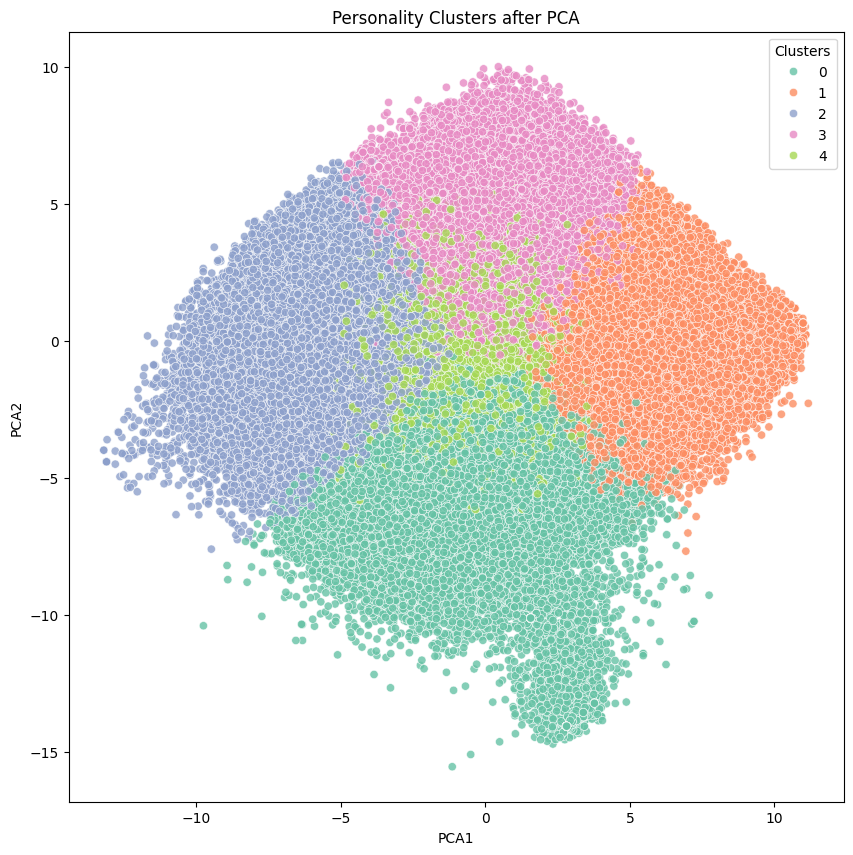

In [133]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_cpu, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

## Phiên bản song song 1: dùng Numba để biên dịch hàm Python ra mã máy và chạy song song trên CPU/host

### Thiết kế

### Cài đặt

In [134]:
import numpy as np
import time
from numba import njit, prange
from numba import config
config.THREADING_LAYER = 'omp'


# Parallelized distance computation
@njit(parallel=True, fastmath=True)
def compute_distances_parallel(X, centroids):
    """
    Compute distances between all points and all centroids in parallel
    X shape: (n_samples, n_features)
    centroids shape: (n_clusters, n_features)
    Returns: (n_samples, n_clusters)
    """
    n_samples, n_features = X.shape
    n_clusters = centroids.shape[0]
    distances = np.zeros((n_samples, n_clusters), dtype=np.float64)

    # Parallel loop over samples
    for i in prange(n_samples):
        for j in range(n_clusters):
            dist_sq = 0.0
            for k in range(n_features):
                diff = X[i, k] - centroids[j, k]
                dist_sq += diff * diff
            distances[i, j] = np.sqrt(dist_sq)

    return distances

# Parallelized cluster assignment
@njit(parallel=True, fastmath=True)
def assign_clusters_parallel(distances):
    """
    Assign each point to nearest cluster in parallel
    """
    n_samples = distances.shape[0]
    assignments = np.zeros(n_samples, dtype=np.int32)

    for i in prange(n_samples):
        min_dist = distances[i, 0]
        best_cluster = 0
        for j in range(1, distances.shape[1]):
            if distances[i, j] < min_dist:
                min_dist = distances[i, j]
                best_cluster = j
        assignments[i] = best_cluster

    return assignments

# Parallelized centroid update
@njit(parallel=True, fastmath=True)
def update_centroids_parallel(X, assignments, n_clusters):
    """
    Update centroids by computing means in parallel
    """
    n_samples, n_features = X.shape
    new_centroids = np.zeros((n_clusters, n_features), dtype=np.float64)
    cluster_counts = np.zeros(n_clusters, dtype=np.int32)

    # Count points and sum coordinates for each cluster in parallel
    for cluster_id in prange(n_clusters):
        count = 0
        for i in range(n_samples):
            if assignments[i] == cluster_id:
                count += 1
                for j in range(n_features):
                    new_centroids[cluster_id, j] += X[i, j]

        cluster_counts[cluster_id] = count

        # Compute mean (avoid division by zero)
        if count > 0:
            for j in range(n_features):
                new_centroids[cluster_id, j] /= count

    return new_centroids, cluster_counts

# Parallelized K-means++ initialization
@njit(parallel=True, fastmath=True)
def compute_min_distances_parallel(X, centroids):
    """
    Compute minimum distance to existing centroids for each point
    """
    n_samples = X.shape[0]
    n_centroids = centroids.shape[0]
    min_distances = np.zeros(n_samples, dtype=np.float64)

    for i in prange(n_samples):
        min_dist = np.inf
        for j in range(n_centroids):
            dist_sq = 0.0
            for k in range(X.shape[1]):
                diff = X[i, k] - centroids[j, k]
                dist_sq += diff * diff
            dist = np.sqrt(dist_sq)
            if dist < min_dist:
                min_dist = dist
        min_distances[i] = min_dist

    return min_distances

# Check convergence in parallel
@njit(parallel=True, fastmath=True)
def check_convergence_parallel(old_centroids, new_centroids, tol):
    """
    Check if centroids have converged
    """
    n_clusters = old_centroids.shape[0]
    converged = True

    for i in prange(n_clusters):
        norm_sq = 0.0
        for j in range(old_centroids.shape[1]):
            diff = new_centroids[i, j] - old_centroids[i, j]
            norm_sq += diff * diff

        if np.sqrt(norm_sq) >= tol:
            converged = False
            break

    return converged

class KMeansNumbaParallel:
    def __init__(self, n_clusters=8, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self._labels = None
        self.n_iter_ = 0

    def _init_centroids_plus_plus(self, X):
        """K-means++ initialization with parallel distance computation"""
        if self.random_state is not None:
            np.random.seed(self.random_state)

        n_samples, n_features = X.shape
        centroids = np.zeros((self.n_clusters, n_features), dtype=np.float64)

        # Choose first centroid randomly
        first_idx = np.random.choice(n_samples)
        centroids[0] = X[first_idx].copy()

        # Choose remaining centroids using K-means++
        for c in range(1, self.n_clusters):
            # Compute minimum distances in parallel
            current_centroids = centroids[:c].copy()
            min_distances = compute_min_distances_parallel(X, current_centroids)

            # Convert to probabilities (squared distances)
            probabilities = min_distances ** 2
            probabilities /= probabilities.sum()

            # Choose next centroid
            next_idx = np.random.choice(n_samples, p=probabilities)
            centroids[c] = X[next_idx].copy()

        return centroids

    def fit(self, X):
        """Fit K-means clustering with parallel computation"""
        X = np.asarray(X, dtype=np.float64)
        if X.ndim != 2:
            raise ValueError("X must be 2D array")

        n_samples, n_features = X.shape

        if n_samples < self.n_clusters:
            raise ValueError("n_samples must be >= n_clusters")

        # Initialize centroids using K-means++
        self.centroids = self._init_centroids_plus_plus(X)

        # Main K-means loop
        for iteration in range(self.max_iter):
            # Compute distances in parallel
            distances = compute_distances_parallel(X, self.centroids)

            # Assign clusters in parallel
            assignments = assign_clusters_parallel(distances)

            # Update centroids in parallel
            new_centroids, cluster_counts = update_centroids_parallel(
                X, assignments, self.n_clusters
            )

            # Handle empty clusters by reinitializing them
            for i in range(self.n_clusters):
                if cluster_counts[i] == 0:
                    # Reinitialize empty cluster to a random point
                    random_idx = np.random.choice(n_samples)
                    new_centroids[i] = X[random_idx].copy()

            # Check convergence in parallel
            if check_convergence_parallel(self.centroids, new_centroids, self.tol):
                break

            self.centroids = new_centroids.copy()

        # Final assignment
        distances = compute_distances_parallel(X, self.centroids)
        self._labels = assign_clusters_parallel(distances)
        self.n_iter_ = iteration + 1

        return self

    def predict(self, X):
        """Predict cluster assignments for new data"""
        if self.centroids is None:
            raise ValueError("Model must be fitted before prediction")

        X = np.asarray(X, dtype=np.float64)
        distances = compute_distances_parallel(X, self.centroids)
        return assign_clusters_parallel(distances)

    def fit_predict(self, X):
        """Fit model and return cluster assignments"""
        return self.fit(X).labels_

    @property
    def labels_(self):
        """Cluster labels for training data"""
        if self._labels is None:
            raise ValueError("Model must be fitted before accessing labels_")
        return self._labels



@njit(fastmath=True)
def compute_inertia(X, centroids, labels):
    """Compute within-cluster sum of squares"""
    inertia = 0.0
    for i in range(X.shape[0]):
        cluster_id = labels[i]
        for j in range(X.shape[1]):
            diff = X[i, j] - centroids[cluster_id, j]
            inertia += diff * diff
    return inertia


### Đánh giá

#### Thời gian chạy

In [135]:
sussy = df[df.columns[0:50]]
sussy = sussy.fillna(0)

In [136]:
sussy.head(5)

EXT1  EXT2  EXT3  EXT4  EXT5  ...  OPN6  OPN7  OPN8  OPN9  OPN10
0   4.0   1.0   5.0   2.0   5.0  ...   1.0   5.0   3.0   4.0    5.0
1   3.0   5.0   3.0   4.0   3.0  ...   1.0   4.0   2.0   5.0    3.0
2   2.0   3.0   4.0   4.0   3.0  ...   2.0   5.0   3.0   4.0    4.0
3   2.0   2.0   2.0   3.0   4.0  ...   1.0   4.0   4.0   3.0    3.0
4   3.0   3.0   3.0   3.0   5.0  ...   1.0   5.0   3.0   5.0    5.0

[5 rows x 50 columns]

In [137]:
import time

start_time = time.time()

kmeans_cpu_parallel = KMeansNumbaParallel(n_clusters=5)
kmeans_cpu_parallel.fit(sussy)

end_time = time.time()
print(f"Runtime: {end_time - start_time:.4f} seconds")

Runtime: 91.6725 seconds


In [138]:
all_results.loc['parallel 1: @jit(parallel=True)', 'Runtime (sec)'] = end_time - start_time
all_results.loc['parallel 1: @jit(parallel=True)', 'Speedup'] = all_results['Runtime (sec)'].get('sequential 1: numpy operation') / (end_time - start_time)
all_results

Runtime (sec)   Speedup
sklearn                               8.966447       NaN
sequential 1: numpy operation       328.931639  1.000000
sequential 2: @jit                  116.095912  2.833275
parallel 1: @jit(parallel=True)      91.672473  3.588118

#### Tính đúng đắn

In [139]:
# Generate synthetic data with true labels
from sklearn.datasets import make_blobs

blob_eval, blob_true_labels = make_blobs(n_samples=10000, centers=3, n_features=10, random_state=42)

# Evaluate with ARI, Homogeneity, etc.
print("\n" + "--------- Clustering Evaluation ---------")

# Use our KMeans to predict the labels
kmeans = KMeansNumbaParallel(n_clusters=3, random_state=42)
blob_predicted_labels = kmeans.fit_predict(blob_eval)

# Evaluate
evaluate_clustering(blob_true_labels, blob_predicted_labels)


--------- Clustering Evaluation ---------
Adjusted Rand Index (ARI): 1.0000
Normalized Mutual Information (NMI): 1.0000
Homogeneity Score: 1.0000
Completeness Score: 1.0000
V-Measure Score: 1.0000


In [140]:
# Evaluate with ARI, Homogeneity, etc.
print("\n" + "--------- Clustering Evaluation ---------")
predicted_labels = kmeans_cpu_parallel.labels_

print(f"\nIterations: {kmeans_cpu_parallel.n_iter_}")
print(f"Final inertia: {compute_inertia(sussy.to_numpy(), kmeans_cpu_parallel.centroids, predicted_labels):.2f}\n")
print("-" * 50 + "\n")
# Evaluate
evaluate_clustering(true_labels, predicted_labels)


--------- Clustering Evaluation ---------

Iterations: 92
Final inertia: 60741041.50

--------------------------------------------------

Adjusted Rand Index (ARI): 0.9734
Normalized Mutual Information (NMI): 0.9601
Homogeneity Score: 0.9600
Completeness Score: 0.9603
V-Measure Score: 0.9601


* **Số vòng lặp (Iterations):** Mô hình hội tụ chỉ sau **92 vòng lặp**, nhanh hơn so với lần trước (120 vòng), cho thấy thuật toán đã tìm được cấu trúc phân cụm ổn định trong thời gian ngắn hơn.

* **Final inertia:** Giá trị quán tính không thay đổi (**60,741,041.50**), cho thấy mô hình đạt cùng mức hội tụ như trước đó về mặt khoảng cách tổng thể giữa các điểm và centroid.

* **Adjusted Rand Index (ARI = 0.9734):** ARI vẫn ở mức rất cao, phản ánh độ tương đồng mạnh mẽ với nhãn thật. Mặc dù thấp hơn một chút so với kết quả trước, sự khác biệt là không đáng kể.

* **Normalized Mutual Information (NMI = 0.9601):** Thông tin chung giữa phân cụm và nhãn thật vẫn cao, mô hình phân cụm gần giống hoàn toàn với ground truth.

* **Homogeneity (0.9600) & Completeness (0.9603):**

  * Cluster thuần nhất và đồng nhất – mỗi cluster gần như chỉ chứa các điểm từ một nhãn duy nhất và ngược lại.
  * Hai chỉ số gần bằng nhau, đảm bảo cân bằng giữa độ chính xác và sự trọn vẹn trong phân cụm.

* **V-Measure (0.9601):** Là kết quả tổng hợp của hai chỉ số trên, tiếp tục khẳng định độ hiệu quả và nhất quán cao của mô hình.

---

**Kết luận**

Mô hình phân cụm lần này vẫn duy trì **hiệu quả rất cao**, chỉ thấp hơn rất nhẹ so với kết quả trước (khác biệt < 0.002 trên các chỉ số). Đặc biệt, việc giảm số vòng lặp xuống còn 92 cho thấy **tốc độ hội tụ đã cải thiện rõ rệt** trong khi độ chính xác vẫn được bảo toàn.


In [141]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions_cpu = kmeans_cpu_parallel.labels_
sussy['Clusters'] = predictions_cpu
sussy.head()

EXT1  EXT2  EXT3  EXT4  EXT5  ...  OPN7  OPN8  OPN9  OPN10  Clusters
0   4.0   1.0   5.0   2.0   5.0  ...   5.0   3.0   4.0    5.0         0
1   3.0   5.0   3.0   4.0   3.0  ...   4.0   2.0   5.0    3.0         2
2   2.0   3.0   4.0   4.0   3.0  ...   5.0   3.0   4.0    4.0         2
3   2.0   2.0   2.0   3.0   4.0  ...   4.0   4.0   3.0    3.0         1
4   3.0   3.0   3.0   3.0   5.0  ...   5.0   3.0   5.0    5.0         0

[5 rows x 51 columns]

In [142]:
sussy.Clusters.value_counts().sort_index(ascending=True)

Clusters
0    210730
1    154732
2    217234
3    203345
4    229300
Name: count, dtype: int64

In [143]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(sussy)

df_pca_cpu = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca_cpu['Clusters'] = predictions_cpu
df_pca_cpu.head()

PCA1      PCA2  Clusters
0 -5.502368  2.042419         0
1 -0.257437 -2.853105         2
2 -0.956943 -1.902869         2
3  0.718258 -0.916976         1
4 -5.387142 -1.409761         0

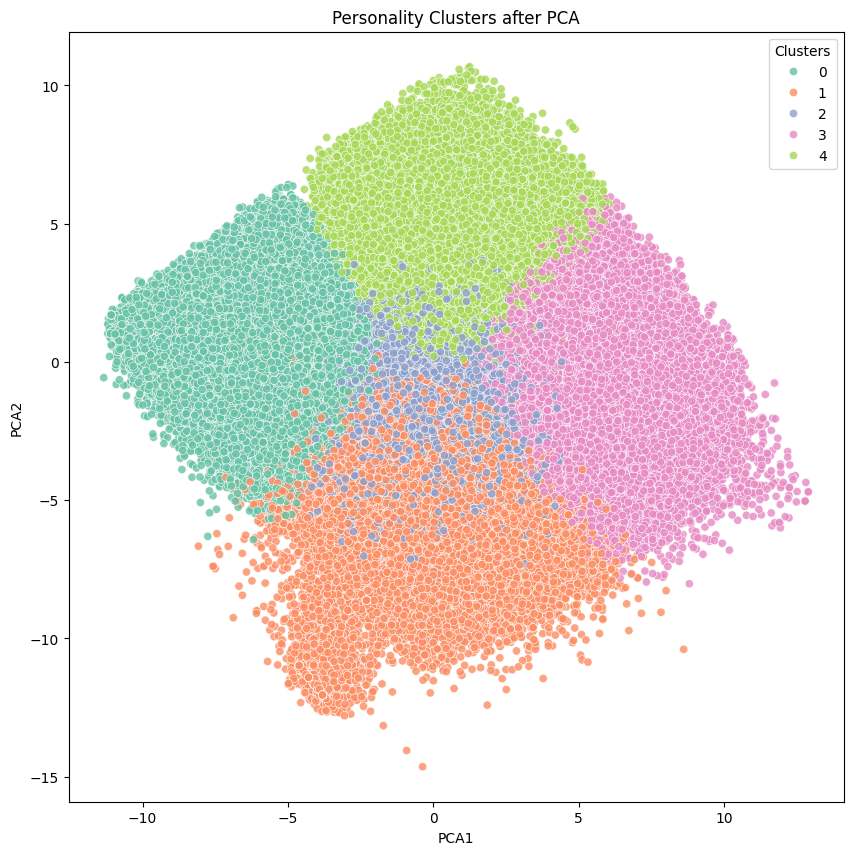

In [144]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_cpu, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');